In [1]:
# !git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 220 (delta 0), reused 0 (delta 0), pack-reused 214
Receiving objects: 100% (220/220), 12.89 MiB | 38.04 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [4]:
 % pip install tifffile
 %cd /content/GDAA2030/tutorial2/moniqueruhl

/content/GDAA2030/tutorial2/moniqueruhl


                                  productId  ...                                       download_url
0  LC08_L1TP_149039_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
1  LC08_L1TP_012001_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
2  LC08_L1TP_012002_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
3  LC08_L1TP_012010_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
4  LC08_L1TP_012011_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...

[5 rows x 12 columns]
0         2017-04-11 05:36:29.349932
1         2017-04-11 15:14:40.001201
2         2017-04-11 15:15:03.871058
3         2017-04-11 15:18:14.918879
4         2017-04-11 15:18:38.780265
                     ...            
1940184   2020-04-21 07:08:15.027279
1940185   2020-04-21 07:08:38.939497
1940186   2020-04-21 07:09:02.843246
1940187   2020-04-21 07:11:02.412814
1940188

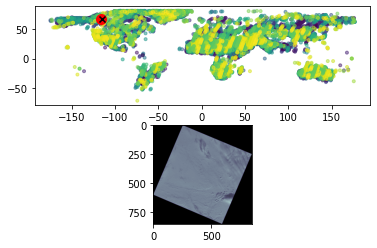

In [5]:
'''
Script Name  : GDAA2030_T2_moniqueruhl_getlandsat.py
Purpose      : Getting landsat scenes from specifing a lat/long location and it chooses the appropriate path 
               row number for landsat 8 scene for a specified band. Also specify the cloud cover percetnage 
               threshold.
Written By   : M Ruhl, 2020.02.11
'''
import GDAA2030_T2_moniqueruhl_getlandsatfunctions as glf

lat=68.504135
lon=-115.564856
band=3
cloudCoverMax=2
# sceneList="scene_list.txt"
sceneList="https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz"
sceneTest=None #set a small number to test, or set to None
imageDir=r'.\images' 

sceneDf=glf.loadSceneList(sceneList,sceneTest,cloudCoverMax)

path,row=glf.findPathRow(sceneDf,lat,lon)

print (path,row)

selectedScene=glf.selectScene(sceneDf,path,row)

print(selectedScene)

imageUrl,imagePath=glf.getImageID(selectedScene,band,imageDir)

glf.downloadImage(imageUrl,imagePath)

glf.plotResults(lat,lon, selectedScene,sceneDf,imagePath)
